# Statistics // Exercise from the Alura course

In [32]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [14]:
dataset = pd.read_csv('../Data/dados.csv')
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [22]:
# Obtaining the mean, median and mode from the Income variable
income_central = {'mean': round(dataset['Renda'].mean(),2),
'median': round(dataset['Renda'].median(),2),
'mode': round(dataset['Renda'].mode(),2)}
income_central

{'mean': 2000.38,
 'median': 1200.0,
 'mode': 0    788
 dtype: int64}

In [23]:
# Obtaining the mad, var and std deviation from the Income variable
income_dispersion = {'Median Absolut Deviation': round(dataset['Renda'].mad(),2),
                     'Variance': round(dataset['Renda'].var(),2),
                     'Standart Deviation': round(dataset['Renda'].std(),2)}
income_dispersion

{'Median Absolut Deviation': 1526.5,
 'Variance': 11044906.01,
 'Standart Deviation': 3323.39}

In [31]:
# crosstabing
income_cross = pd.crosstab(dataset.Sexo,dataset.Cor,values=dataset.Renda, aggfunc={'mean', 'median', 'max'})
# making more readable
income_cross.rename(index={0:'Male', 1:'Female'}, inplace=True)
income_cross.rename(columns={0:'Native', 2: 'White', 4: 'Black', 6: 'Asian', 8: 'Pardo', 9: 'N/D'}, inplace=True)
income_cross

max                                               mean  \
Cor       Native     White    Black    Asian     Pardo       Native   
Sexo                                                                  
Male     10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Female  120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                           median          \
Cor           White        Black        Asian        Pardo Native   White   
Sexo                                                                        
Male    2925.744435  1603.861687  4758.251064  1659.577425  797.5  1700.0   
Female  2109.866750  1134.596400  3027.341880  1176.758516  788.0  1200.0   

                                
Cor      Black   Asian   Pardo  
Sexo                            
Male    1200.0  2800.0  1200.0  
Female   800.0  1500.0   800.0

[Text(0, 0, 'Native'),
 Text(0, 1, 'white'),
 Text(0, 2, 'Black'),
 Text(0, 3, 'Asian'),
 Text(0, 4, 'Pardo')]

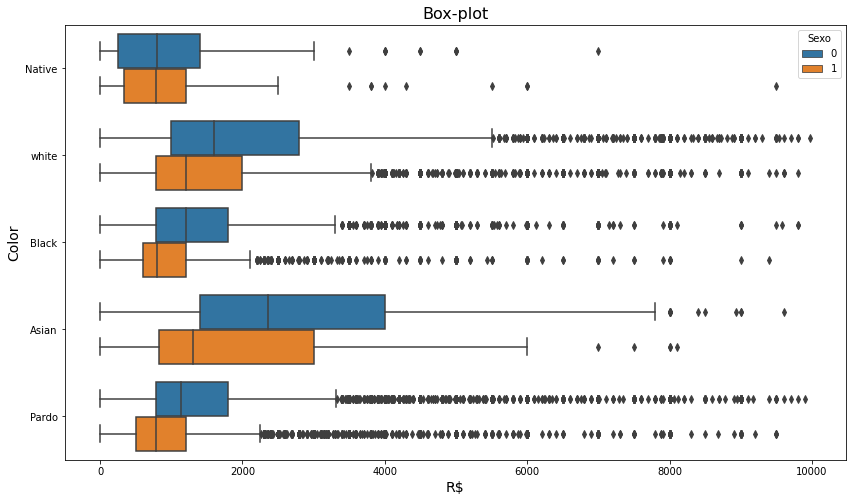

In [39]:
#ploting graphs
chart =  sns.boxplot(x= 'Renda', y = 'Cor', hue='Sexo', data=dataset.query('Renda < 10000'), orient='h')
chart.figure.set_size_inches(14, 8)
chart.set_title('Box-plot', fontsize=16)
chart.set_xlabel('R$', fontsize=14)
chart.set_ylabel('Color', fontsize=14)
chart.set_yticklabels(['Native', 'White', 'Black', 'Asian', 'Pardo'])  

In [41]:
# Percentil and quartile getting
percentil = stats.percentileofscore(dataset.Renda, 788, kind = 'weak')
quantile = dataset.Renda.quantile(.99)

28.87%


In [45]:
# Income crosstabed with Study years and genders
income_cross_2 = pd.crosstab(dataset['Anos de Estudo'],
                            dataset.Sexo,
                            aggfunc={'mean', 'median', 'max', 'std'},
                            values = dataset.Renda).round(2)
income_cross_2

max               mean           median              std  \
Sexo                   0         1        0        1       0       1        0   
Anos de Estudo                                                                  
1                30000.0   10000.0   799.49   516.20   700.0   390.0  1023.90   
2                30000.0    2000.0   895.63   492.77   788.0   400.0  1331.95   
3                40000.0    4000.0   931.18   529.91   788.0   450.0  1435.17   
4                80000.0    3500.0  1109.20   546.85   800.0   500.0  2143.80   
5                50000.0   10000.0  1302.33   704.28  1000.0   788.0  1419.82   
6                35000.0    8000.0  1338.65   781.39  1045.0   788.0  1484.65   
7                25000.0    6000.0  1448.88   833.73  1200.0   788.0  1476.63   
8                40000.0    9000.0  1465.50   830.75  1200.0   788.0  1419.71   
9                30000.0   18000.0  1639.40   933.62  1300.0   800.0  1515.58   
10               60000.0   20000.0  1508.04   868.02  1200.0   788.0  2137.66   
11               45000.0    6000.0  1731.27   925.92  1218.0   800.0  2078.61   
12              200000.0  100000.0  2117.06  1286.79  1500.0  1000.0  2676.54   
13               30000.0  120000.0  2470.33  1682.31  1800.0  1200.0  2268.08   
14               25000.0   20000.0  3195.10  1911.73  2400.0  1300.0  2797.12   
15               50000.0   20000.0  3706.62  2226.46  2500.0  1600.0  3987.21   
16              200000.0  100000.0  6134.28  3899.51  4000.0  2800.0  7447.61   
17                7000.0    3000.0  1295.76   798.17  1200.0   788.0   979.65   

                         
Sexo                  1  
Anos de Estudo           
1                639.31  
2                425.29  
3                498.23  
4                424.12  
5                629.55  
6                635.78  
7                574.55  
8                602.04  
9                896.78  
10               973.22  
11               620.61  
12              1819.04  
13              4851.83  
14              2053.79  
15              2064.08  
16              4212.77  
17               459.99

<AxesSubplot:title={'center':'Box-plot 2'}, xlabel='R$', ylabel='Anos de Estudo'>

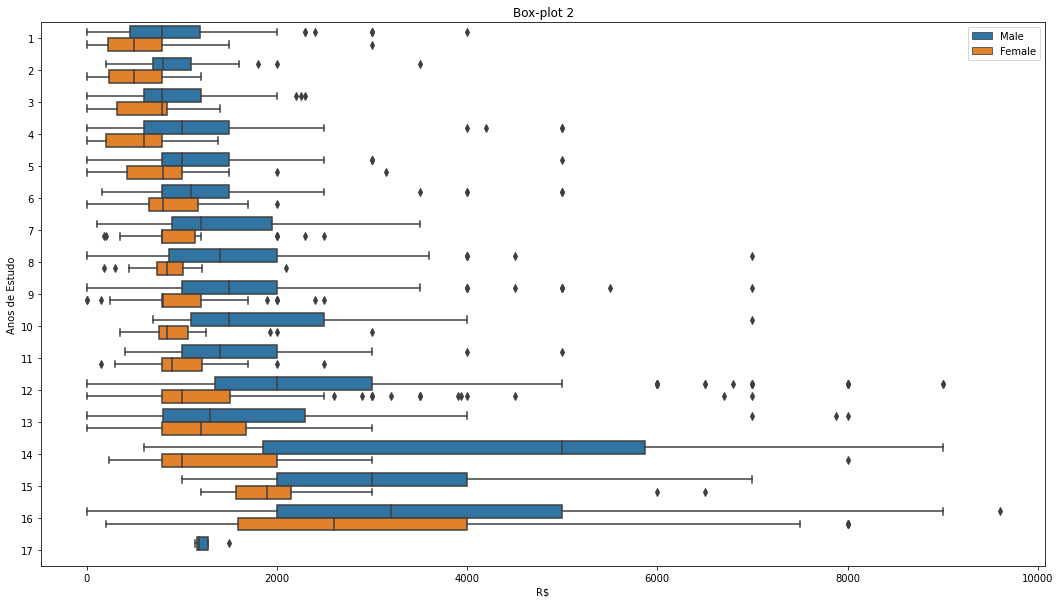

In [52]:
# Only people who gain less than 10k with 50 years old, by income
chart_2 = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', data=dataset.query('Renda < 10000 and Idade == 50'), orient='h')
chart_2.figure.set_size_inches(18,10)
chart_2.set_title('Box-plot 2')
chart_2.set_xlabel('R$')
chart_2.set_ylabel('Anos de Estudo')

handles, _ = chart_2.get_legend_handles_labels()
chart_2.legend(handles, ['Male', 'Female'])
chart_2

In [55]:
# Groupby UF
stats_UF = dataset.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
stats_UF

Renda                            
           mean median     max          std
UF                                         
11  1789.761223   1200   50000  2406.161161
12  1506.091782    900   30000  2276.233415
13  1445.130100    900   22000  1757.935591
14  1783.588889   1000   20000  2079.659238
15  1399.076871    850   50000  2053.779555
16  1861.353516   1200   15580  2020.688632
17  1771.094946   1000   60000  2934.590741
21  1019.432009    700   30000  1887.816905
22  1074.550784    750   40000  2373.355726
23  1255.403692    789   25000  1821.963536
24  1344.721480    800   15500  1651.805500
25  1293.370487    788   30000  1950.272431
26  1527.079319    900   50000  2389.622497
27  1144.552602    788   11000  1237.856197
28  1109.111111    788   16000  1478.997878
29  1429.645094    800  200000  3507.917248
31  2056.432084   1200  100000  3584.721547
32  2026.383852   1274  100000  3513.846868
33  2496.403168   1400  200000  5214.583518
35  2638.104986   1600   80000  3503.777366
41  2493.870753   1500  200000  4302.937995
42  2470.854945   1800   80000  3137.651112
43  2315.158336   1500   35000  2913.335783
50  2262.604167   1500   42000  3031.419122
51  2130.652778   1500   35000  2542.630178
52  1994.580794   1500   30000  2221.933065
53  4241.954722   2000  100000  5550.463338